In [7]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [8]:
from google.colab import files
uploaded=files.upload()

In [9]:
img_T = cv.imread('/content/2.img.png')
image = cv.cvtColor(img_T, cv.COLOR_BGR2RGB)

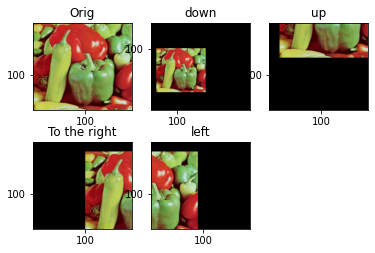

In [ ]:
#@title ARITHMETIC {run:'auto'}

Transformation = "Shearing" #@param["Translation","Scaling","Shearing","Reflection","Rotation"]

if Transformation == "Scaling":
    print(image.shape)
    #rows, cols, dim = image.shape
    #print(rows)

    # disable x & y axis
    plt.axis('off')
    # show the image
    plt.imshow(image)
    plt.show()
    # get the image shape
    rows, cols, dim = image.shape
    #transformation matrix for Scaling
    M = np.float32([[2, 0  , 0],
                  [0,   2, 0],
                  [0,   0,   1]])
    # apply a perspective transformation to the image
    scaled_img = cv.warpPerspective(image,M,(cols*2,rows*2))
    # disable x & y axis
    #plt.axis('off')
    # show the resulting image
    cv2_imshow(scaled_img)
    #plt.imshow(scaled_img)
    print(scaled_img.shape)
    #plt.show()
    # save the resulting image to disk
    plt.imsave("fruits_scaled.jpg", scaled_img)


if Transformation == "Shearing":
    plt.axis('off')
    # show the image
    plt.imshow(image)
    plt.show()
    # get the image shape
    rows, cols, dim = image.shape
    # transformation matrix for Shearing
    # shearing applied to x-axis
    M1 = np.float32([[1, 0.5, 0],
                  [0.5, 1  , 0],
                  [0, 0  , 1]])

    # apply a perspective transformation to the image                
    sheared_img = cv.warpPerspective(image,M1,(int(cols*1.5),int(rows*1.5)))
    #sheared_imgy = cv.warpPerspective(image,M2,(int(cols*1.5),int(rows*1.5)))

    # disable x & y axis
    plt.axis('off')
    # show the resulting image
    
    plt.imshow(sheared_imgx)
    plt.show()
    # save the resulting image to disk
    plt.imsave("cameramen_sheared.jpg", sheared_img)

if Transformation == "Reflection":
    plt.imshow(image)
    plt.show()
    # get the image shape
    rows, cols, dim = image.shape
    # transformation matrix for x-axis reflection 
    M = np.float32([[1,  0, 0   ],
                    [0, -1, rows],
                    [0,  0, 1   ]])

    # apply a perspective transformation to the image
    reflected_img = cv.warpPerspective(image,M,(int(cols),int(rows)))
    # disable x & y axis
    #plt.axis('off')
    # show the resulting image
    plt.imshow(reflected_img)
    plt.show()


if Transformation == "Rotation":
    rotation_angle =  20#@param{type: "number"}
    plt.imshow(image)
    plt.show()
    # get the image shape
    rows, cols, dim = image.shape
    #angle from degree to radian
    angle = np.radians(rotation_angle)
    #transformation matrix for Rotation
    M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
                  [np.sin(angle), np.cos(angle), 0],
                  [0, 0, 1]])
    # apply a perspective transformation to the image
    rotated_img = cv.warpPerspective(image, M, (int(cols),int(rows)))
    # disable x & y axis
    #plt.axis('off')
    # show the resulting image
    plt.imshow(rotated_img)
    plt.show()
    # save the resulting image to disk
    plt.imsave("leena_rotated.jpg", rotated_img)
if Transformation == "Translation":
    # The image moves down, up, right, left
    M = np.float32([[1, 0, 20], [0, 1, 100], [0, 0, 1]])
    img1 = cv.warpPerspective(image, M, (image.shape[1]*2, image.shape[0]*2))

    M = np.float32([[1, 0, 20], [0, 1, -100], [0, 0, 1]])
    img2 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

    M = np.float32([[1, 0, 100], [0, 1, 20], [0, 0, 1]])
    img3 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

    M = np.float32([[1, 0, -100], [0, 1, 20], [0, 0, 1]])
    img4 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

    # Display graphics
    titles = ['Orig', 'down', 'up', 'To the right', 'left']
    images = [image, img1, img2, img3, img4]
    for i in range(1,6):            
        plt.subplot(2, 3, i )  
        
        plt.imshow(images[i-1])          
        plt.title(titles[i-1])
        plt.xticks([100]), plt.yticks([100])
    plt.show()


  #@markdown Image is shown below

In [ ]:
def main():
    img = cv2.imread("/content/img1.png", 1)
    #img = cv2.imread("/content/peppers_gray.tif", 1)
    #img = cv2.imread("/content/cameraman.jpg", 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    k1 = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]), np.float32)
    
    print(k1)
    print(type(k1))

    output = cv2.filter2D(img, -1, k1)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(output)
    plt.title('Sharpen Edges')
    
    plt.show()

if _name_ == "_main_":
    main()